<a href="https://colab.research.google.com/github/Roberto5200/Roberto-/blob/main/Modelo_de_Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Declaración de librerías

Las celdas de código están escritas siguiendo la sintaxis del lenguaje de programación en Python. Esta celda de código permite cargar librerías. Una librería es un conjunto de comandos preescritos para que los programadores pueden utilizar y realizar tareas específicas sin necesidad de escribir el código desde cero.


In [17]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configurar estilos de gráficos
sns.set(style="whitegrid")

# Esta línea permite que las visualizaciones sean renderizadas directamente en el cuaderno
%matplotlib inline

## Carga del conjunto datos (dataset)

La presente celda permite cargar un archivo que representa el dataset a explorar mediante el comando files.upload(). El comando print() permite mostrar el contenido del archivo.

In [18]:
datos = files.upload()
print(datos)

Saving notasci.csv to notasci (3).csv
{'notasci (3).csv': b'\xef\xbb\xbfCEDULA,N61,N71,N101,N111,N121,P1,E1,H1,R1,N62,N72,N102,N112,N122,P2,E2,H2,NOTA,R2\r\n0705997302,2,1,1,1,2,7,0.3,7.3,A,2,1,1,1,2,7,2.4,9.4,8.35,A\r\n0705607950,2,1,1,1,2,7,0.6,7.6,A,2,1,1,1,2,7,2.1,9.1,8.35,A\r\n0750125148,2,1,1,1,2,7,0,7,A,2,1,1,1,2,7,2.4,9.4,8.2,A\r\n0106155351,1.87,0.95,1,1,2,6.82,0.3,7.12,A,2,0.5,1,1,2,6.5,2.55,9.05,8.09,A\r\n0750613168,2,1,1,1,2,7,0.3,7.3,A,2,1,1,1,2,7,1.5,8.5,7.9,A\r\n0750867319,2,0.9,1,1,2,6.9,2.1,9,A,1,0.9,1,1,2,5.9,1.5,7.4,8.2,A\r\n0750174245,1.3,1,0.5,0.8,1.6,5.2,0.3,5.5,R,0,0,0,0,0,0,0,0,2.75,R\r\n0706404480,2,1,1,1,2,7,0.9,7.9,A,2,1,1,1,2,7,1.8,8.8,8.35,A\r\n0705730471,2,0.7,1,1,2,6.7,0.3,7,A,2,1,1,1,2,7,2.4,9.4,8.2,A\r\n0705485381,1.9,1,1,1,2,6.9,0.3,7.2,A,2,1,1,1,2,7,2.1,9.1,8.15,A\r\n0705523900,1.77,0.9,1,1,2,6.67,1.05,7.72,A,2,0.5,1,1,2,6.5,1.8,8.3,8.01,A\r\n0704982156,0,0,0.5,0.2,0.4,1.1,0,1.1,R,0,0,0,0,0,0,0,0,0.55,R\r\n0706433430,2,1,1,1,2,7,0.6,7.6,A,2,1,1,1,2,7,

Una vez cargado el archivo, se procede a leer su ubicación y convertirlo en un dataframe a través de la librería Pandas. El comando read_csv() permite acceder al contenido del archivo en formato .csv.

In [ ]:
tabla= pd.read_csv("/content/notasci.csv")
tabla

,CEDULA,N61,N71,N101,N111,N121,P1,E1,H1,R1,N62,N72,N102,N112,N122,P2,E2,H2,NOTA,R2
0,705997302,2.00,1.00,1.0,1.0,2.0,7.00,0.30,7.30,A,2,1.0,1.0,1.0,2.0,7.0,2.40,9.40,8.35,A
1,705607950,2.00,1.00,1.0,1.0,2.0,7.00,0.60,7.60,A,2,1.0,1.0,1.0,2.0,7.0,2.10,9.10,8.35,A
2,750125148,2.00,1.00,1.0,1.0,2.0,7.00,0.00,7.00,A,2,1.0,1.0,1.0,2.0,7.0,2.40,9.40,8.20,A
3,106155351,1.87,0.95,1.0,1.0,2.0,6.82,0.30,7.12,A,2,0.5,1.0,1.0,2.0,6.5,2.55,9.05,8.09,A
4,750613168,2.00,1.00,1.0,1.0,2.0,7.00,0.30,7.30,A,2,1.0,1.0,1.0,2.0,7.0,1.50,8.50,7.90,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,706467131,1.80,1.00,1.0,1.0,1.8,6.60,2.60,9.20,A,1,1.0,1.0,1.0,2.0,6.0,2.40,8.40,8.80,A
69,706863123,1.80,1.00,1.0,1.0,1.4,6.20,1.75,7.95,A,1,1.0,1.0,1.0,2.0,6.0,2.70,8.70,8.33,A
70,750048076,1.80,1.00,1.0,1.0,1.8,6.60,2.65,9.25,A,1,1.0,1.0,1.0,2.0,6.0,2.10,8.10,8.68,A
71,960081925,1.80,1.00,1.0,1.0,1.4,6.20,3.00,9.20,A,1,1.0,1.0,1.0,2.0,6.0,2.70,8.70,8.95,A


## Preprocesamiento de los datos

Convertir la variable objetivo a binaria


In [ ]:
tabla['R1'] = tabla['R1'].map({'A': 1, 'R': 0})
tabla['R2'] = tabla['R2'].map({'A': 1, 'R': 0})
tabla

,CEDULA,N61,N71,N101,N111,N121,P1,E1,H1,R1,N62,N72,N102,N112,N122,P2,E2,H2,NOTA,R2
0,705997302,2.00,1.00,1.0,1.0,2.0,7.00,0.30,7.30,1,2,1.0,1.0,1.0,2.0,7.0,2.40,9.40,8.35,1
1,705607950,2.00,1.00,1.0,1.0,2.0,7.00,0.60,7.60,1,2,1.0,1.0,1.0,2.0,7.0,2.10,9.10,8.35,1
2,750125148,2.00,1.00,1.0,1.0,2.0,7.00,0.00,7.00,1,2,1.0,1.0,1.0,2.0,7.0,2.40,9.40,8.20,1
3,106155351,1.87,0.95,1.0,1.0,2.0,6.82,0.30,7.12,1,2,0.5,1.0,1.0,2.0,6.5,2.55,9.05,8.09,1
4,750613168,2.00,1.00,1.0,1.0,2.0,7.00,0.30,7.30,1,2,1.0,1.0,1.0,2.0,7.0,1.50,8.50,7.90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,706467131,1.80,1.00,1.0,1.0,1.8,6.60,2.60,9.20,1,1,1.0,1.0,1.0,2.0,6.0,2.40,8.40,8.80,1
69,706863123,1.80,1.00,1.0,1.0,1.4,6.20,1.75,7.95,1,1,1.0,1.0,1.0,2.0,6.0,2.70,8.70,8.33,1
70,750048076,1.80,1.00,1.0,1.0,1.8,6.60,2.65,9.25,1,1,1.0,1.0,1.0,2.0,6.0,2.10,8.10,8.68,1
71,960081925,1.80,1.00,1.0,1.0,1.4,6.20,3.00,9.20,1,1,1.0,1.0,1.0,2.0,6.0,2.70,8.70,8.95,1


Seleccionar las variables predictoras y la variable objetivo

X: Variables predictoras
*   *N61*:	Evaluación Sistemática (oral y/o escrita) del Hemisemestre 1
*   *N71*:	Portafolio del Hemisemestre 1
*   *N101*:	Trabajos de investigación del Hemisemestre 1
*   *N111*: Trabajo práctico de resolución de problemas del Hemisemestre 1
*   *N121*:	Taller práctico del Hemisemestre 1
*   *E1*:	Nota del examen del Hemisemestre 1

y2: Variable objetivo
*   *R2*: El valor de 1 es para Aprobar y el valor de 0 es para Reprobar la Asignatura en función de la Nota Final.

y1: es la variable que predice a partir de R1 la cual aprueba a quienes tienen un H1 >= 7.0



In [ ]:
X = tabla[['N61', 'N71', 'N101', 'N111', 'N121', 'E1']]
y1 = tabla['R1']
y2 = tabla['R2']
X

,N61,N71,N101,N111,N121,E1
0,2.00,1.00,1.0,1.0,2.0,0.30
1,2.00,1.00,1.0,1.0,2.0,0.60
2,2.00,1.00,1.0,1.0,2.0,0.00
3,1.87,0.95,1.0,1.0,2.0,0.30
4,2.00,1.00,1.0,1.0,2.0,0.30
...,...,...,...,...,...,...
68,1.80,1.00,1.0,1.0,1.8,2.60
69,1.80,1.00,1.0,1.0,1.4,1.75
70,1.80,1.00,1.0,1.0,1.8,2.65
71,1.80,1.00,1.0,1.0,1.4,3.00


División de los datos en conjuntos de entrenamiento (train) y prueba (test)

In [ ]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.5, random_state=42)


Crear el modelo de regresión logística

In [19]:
model = LogisticRegression()
model.fit(X_train, y2_train)

LogisticRegression()

## Evaluación del modelo sobre la predicción de nuestro modelo

In [20]:
y_pred = model.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y2_test, y_pred)
print(f'Exactitud del modelo: {accuracy}')

# Matriz de confusión
conf_matrix = confusion_matrix(y2_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

Exactitud del modelo: 0.9459459459459459
Matriz de confusión:
[[ 2  1]
 [ 1 33]]


## Visualización de la matriz de confusión

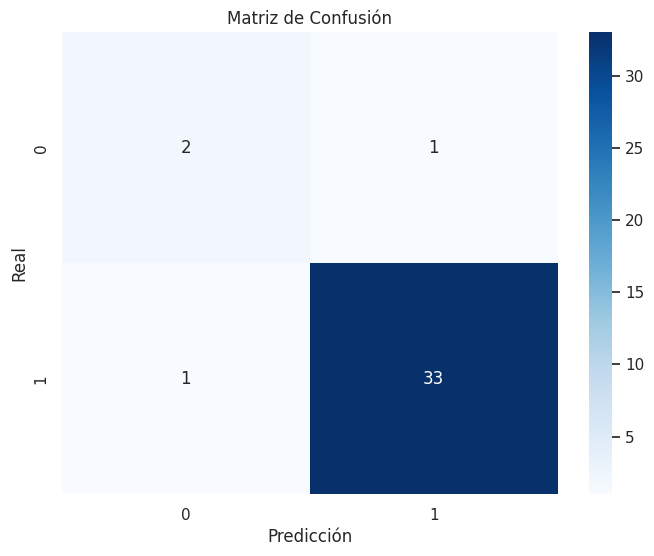

In [21]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

## Evaluación del modelo sobre la base de aquellos que con el 70% en el primer hemisemestre, aprobarían el semestre

In [22]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y2_test, y1_test)
print(f'Exactitud del modelo: {accuracy}')

# Matriz de confusión
conf_matrix = confusion_matrix(y2_test, y1_test)
print('Matriz de confusión:')
print(conf_matrix)

Exactitud del modelo: 0.9459459459459459
Matriz de confusión:
[[ 3  0]
 [ 2 32]]


## Visualización de la matriz de confusión

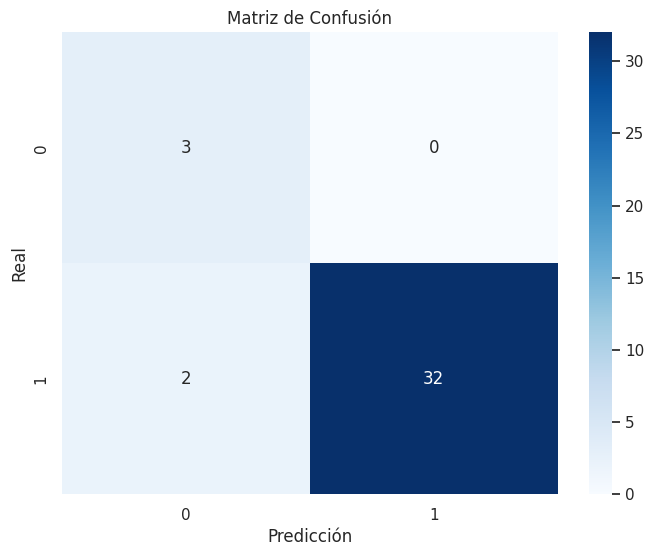

In [23]:
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()